# Machine Learning
* Introduction
* Preprocessing
* Training



## Introduction
* Machine Learning 이란?
  * 경험을 통해 자동으로 개선하는 컴퓨터 알고리즘의 연구 ([wiki](https://ko.wikipedia.org/wiki/%EA%B8%B0%EA%B3%84_%ED%95%99%EC%8A%B5))
* 알고리즘 유형
  * 지도 학습 (Supervised learning)
    * 훈련 데이터로부터 하나의 함수를 유추, 해당 함수에 대한 평가를 통해 파라미터를 최적화 ([wiki](https://ko.wikipedia.org/wiki/%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5))
  * 비지도 학습 (Unsupervised learning)
    * 데이터가 어떻게 구성되어있는지를 알아내는 문제. 지도 학습, 강화 학습과는 달리 입력값에 대한 목표치가 주어지지 않음 ([wiki](https://ko.wikipedia.org/wiki/%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5))
  * 준지도 학습 (Semi-Supervised learning)
    * 목표값이 표시된 데이터와 표시되지 않은 데이터를 모두 훈련에 사용하는 방법. 훈련 데이터는 주로 목표값이 표시된 데이터가 적고 표시되지 않은 데이터를 많이 갖고 있음 ([wiki](https://ko.wikipedia.org/wiki/%EC%A4%80_%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5))
  * 강화 학습 (Reinforcement learning)
    * 어떤 환경 안에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법. ([wiki](https://ko.wikipedia.org/wiki/%EA%B0%95%ED%99%94_%ED%95%99%EC%8A%B5))

## Preprocessing
* Data Preprocessing : 데이터를 실제 업무에 활용하기에 앞서서 정제하는 행위 ([wiki](http://itwiki.kr/w/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC))
  * 데이터 분석가는 업무 시간 중 80%정도를 데이터 수집 및 전처리 과정에 사용...
* 종류
  * 이상치 처리
  * 결측치 처리
  * 노이즈 제거
  * 등등....

### 데이터 소개
* Titanic dataset
  * 타이타닉에 탑승한 사람들의 신상정보를 활용하여 승선한 사람들의 생존여부를 예측
  * https://www.kaggle.com/c/titanic/overview

#### 데이터셋 확인

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
!ls

cxr_example.png  gender_submission.csv	sample_data  test.csv  train.csv


In [5]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [6]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

참조 : https://kaggle-kr.tistory.com/17

| 변수 | 정의 | 설명 | 타입 |
| ----- | ----- | ----- | ----- |
| PassengerId | 승객 번호 | 승객별 번호 | int |
| survival | 생존 여부 | 0=dead, 1=survived | int |
| Pclass | 승객이 가지고 있는 티켓의 클래스 | 1=first, 2=second, 3=third class | int |
| Name | 이름 | 승객 이름 | str |
| Sex | 성별 | male, female | str |
| Age | 나이 | continuous | int |
| SibSp | 함께 탑승한 형제와 배우자의 수 | quantitative | int |
| Parch | 함께 탑승한 부모, 아이의 수 | quantitative | int |
| Ticket | 티켓 번호 | alphabet + int | str |
| Fare | 탑승료 | continuous | float |
| Cabin | 객실 번호 | alphabet + int | str |
| Embarked | 탑승 항구 | C=Cherbourg, Q=Queenstown, S=Southampton | str |

In [7]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

#### 정답 비율 확인

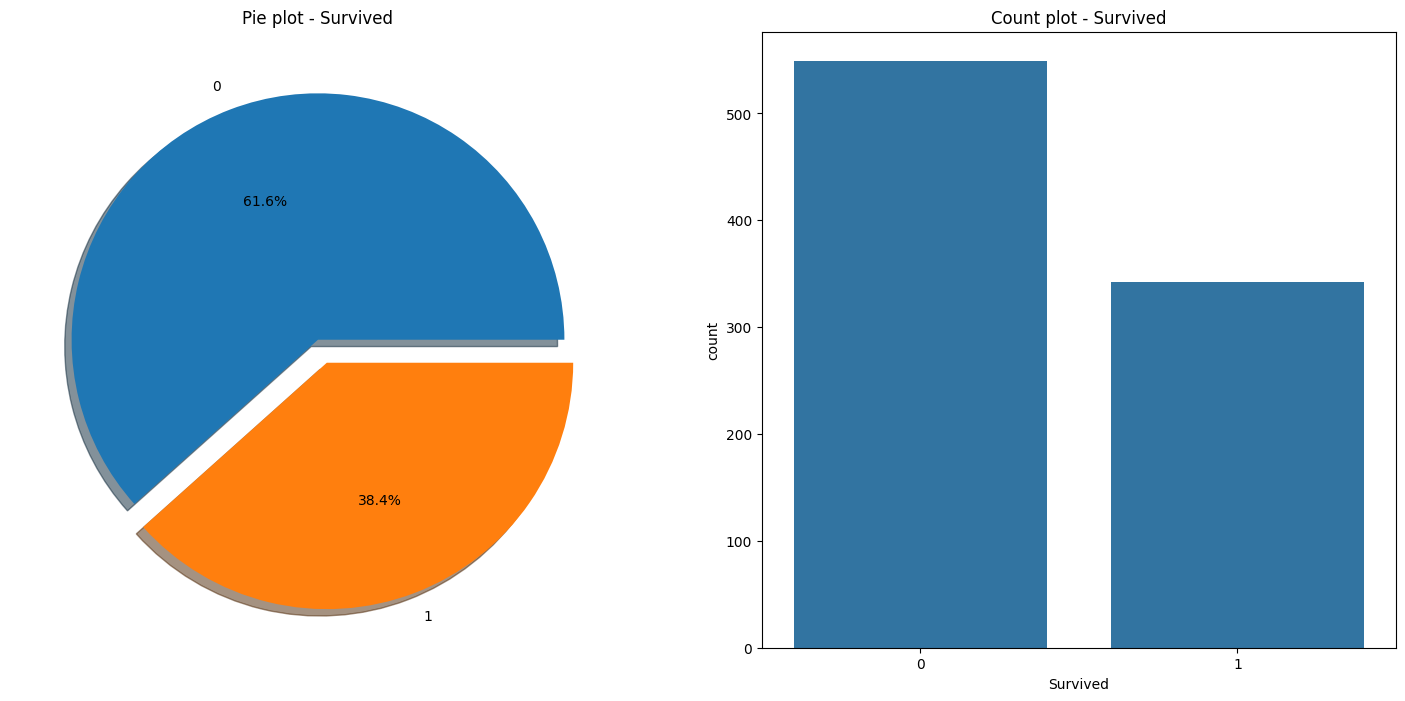

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

#### Feature Expolaration

In [16]:
def count_per_class(column_name):
  return df_train[[column_name, 'Survived']].groupby([column_name], as_index=True).count() # 각 클래스에 몇 명이 있는지

def get_survived(column_name):
  return df_train[[column_name, 'Survived']].groupby([column_name], as_index=True).sum() # 각 클래스에서 몇 명이 생존했는지

def plot_survived(column_name):
  y_position = 1.02
  f, ax = plt.subplots(1, 2, figsize=(18, 8))
  df_train[column_name].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
  ax[0].set_title('Number of Passengers By {}'.format(column_name), y=y_position)
  ax[0].set_ylabel('Count')
  sns.countplot(x = column_name, hue='Survived', data=df_train, ax=ax[1])
  ax[1].set_title('{}: Survived vs Dead'.format(column_name), y=y_position)
  plt.show()

##### Pclass

In [17]:
count_per_class('Pclass')

Survived
Pclass          
1            216
2            184
3            491

In [18]:
get_survived('Pclass')

Survived
Pclass          
1            136
2             87
3            119

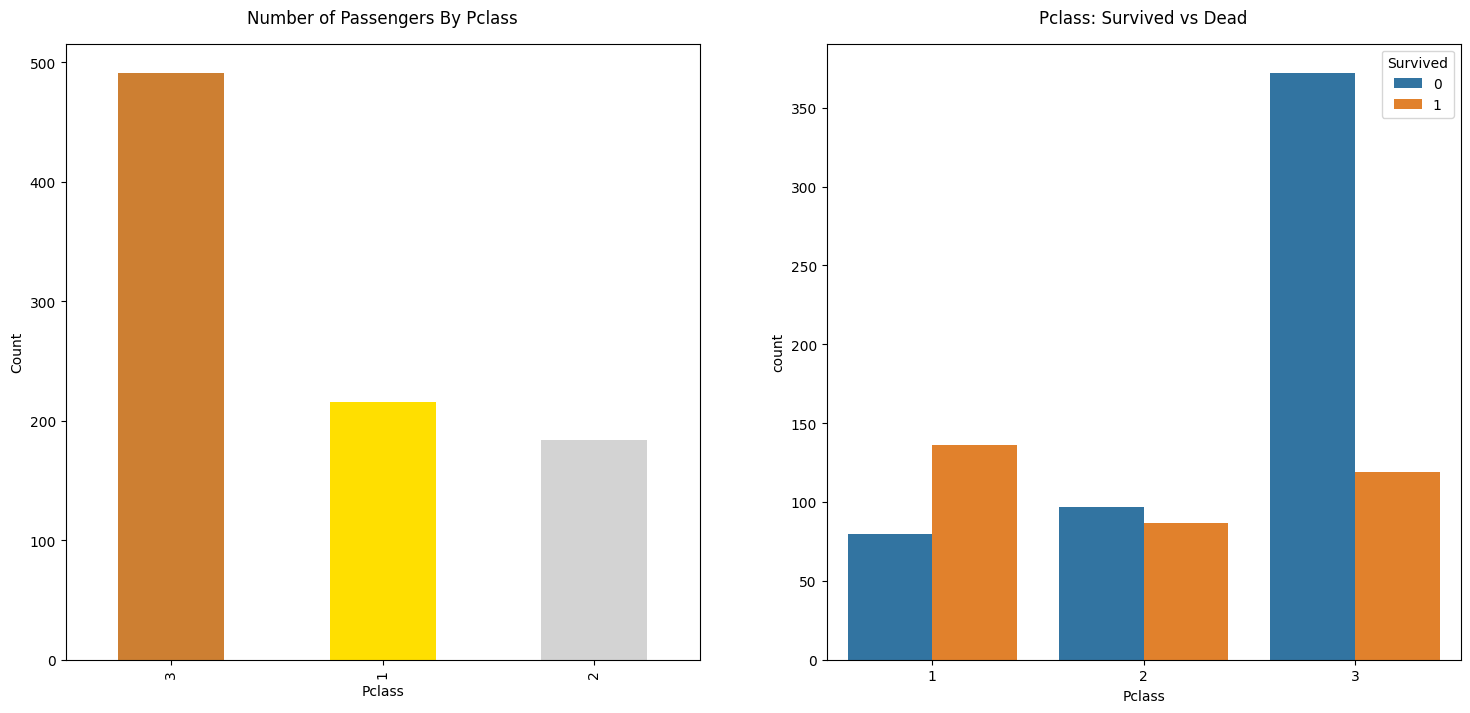

In [19]:
plot_survived('Pclass')

##### Sex

In [20]:
count_per_class('Sex')

Survived
Sex             
female       314
male         577

In [21]:
get_survived('Sex')

Survived
Sex             
female       233
male         109

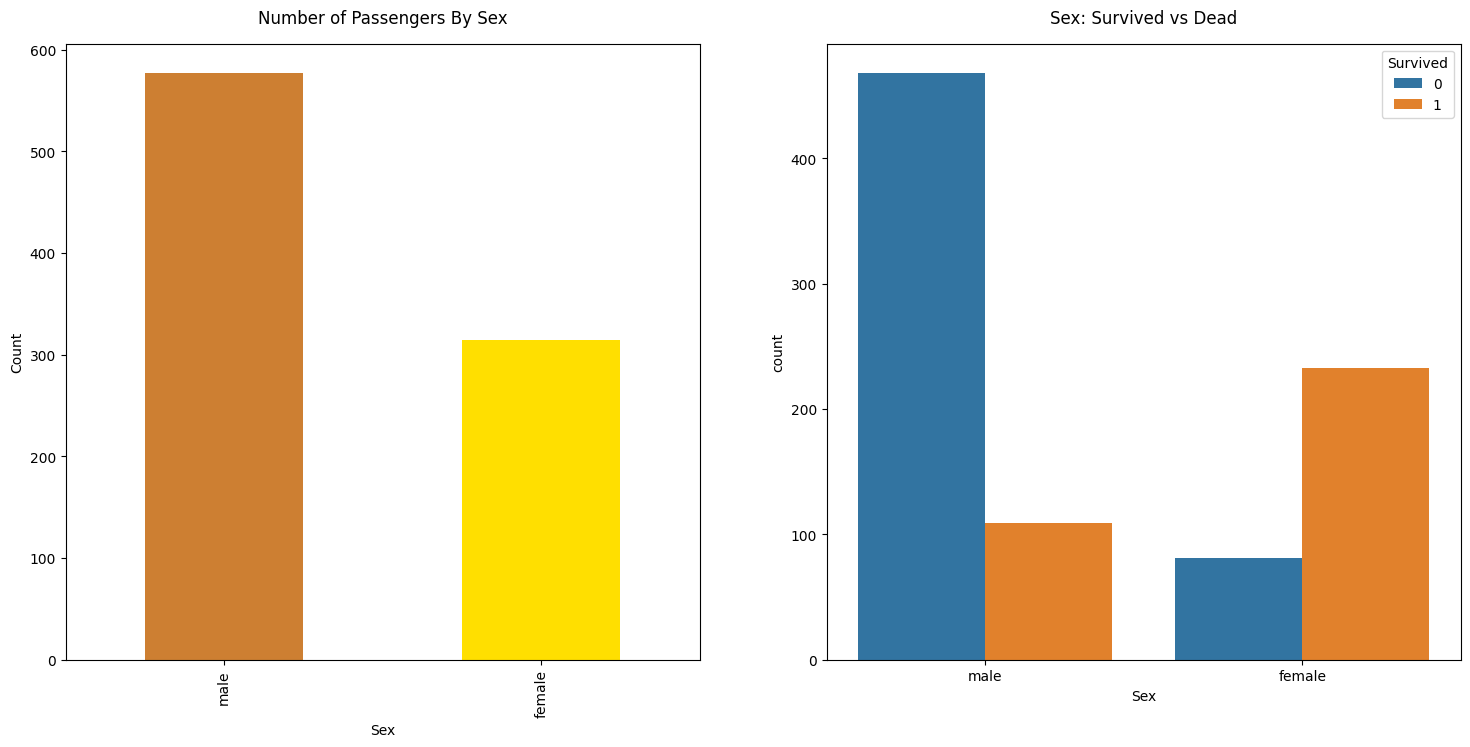

In [22]:
plot_survived('Sex')

##### Age

In [23]:
def plt_continuous_histogram(column_name):
  fig, ax = plt.subplots(1, 1, figsize=(9, 5))
  sns.kdeplot(df_train[df_train['Survived'] == 1][column_name], ax=ax)
  sns.kdeplot(df_train[df_train['Survived'] == 0][column_name], ax=ax)
  plt.legend(['Survived : 1', 'Survived : 0'])
  plt.show()

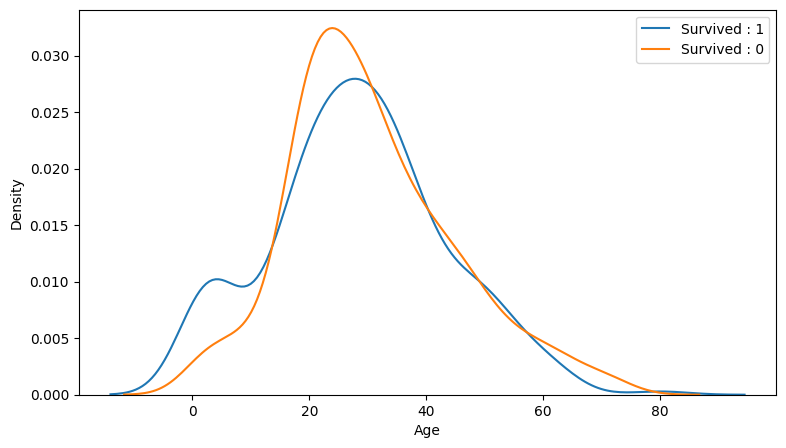

In [24]:
plt_continuous_histogram('Age')

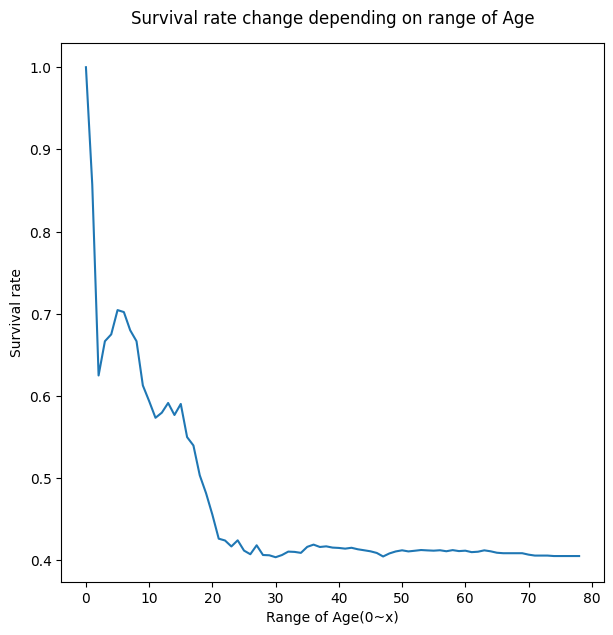

In [25]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

##### Pclass + Age

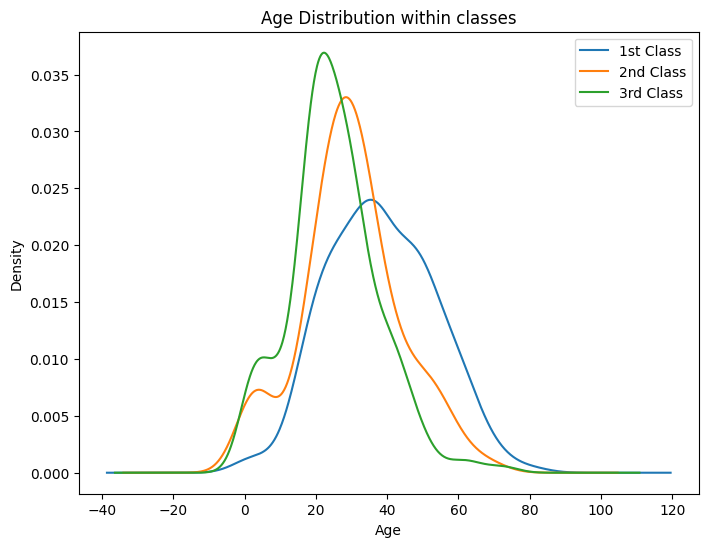

In [26]:
# Pclass + Age
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

##### Pclass + Sex + Age

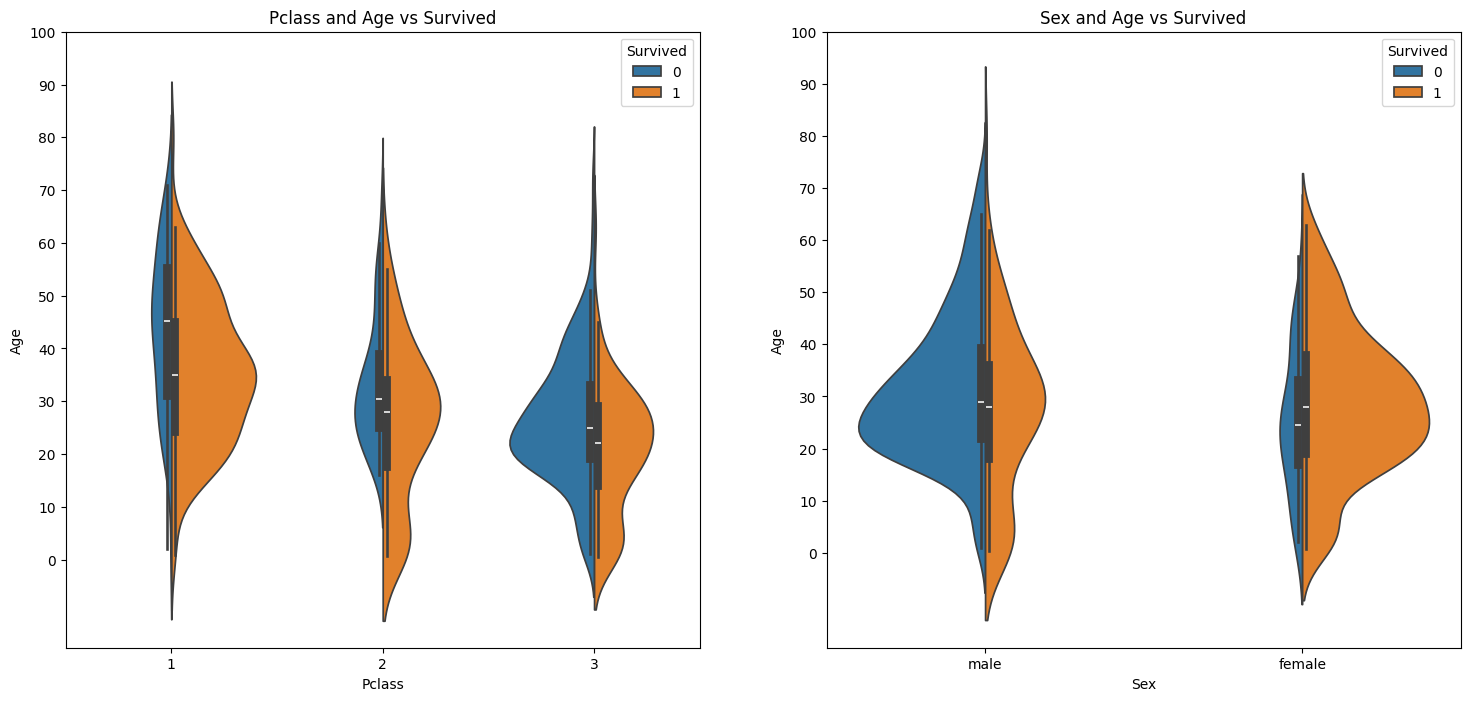

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0]) # Specify x and y using keywords
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1]) # Specify x and y using keywords
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

##### Embarked

In [32]:
count_per_class('Embarked')

Survived
Embarked          
C              168
Q               77
S              644

In [33]:
get_survived('Embarked')

Survived
Embarked          
C               93
Q               30
S              217

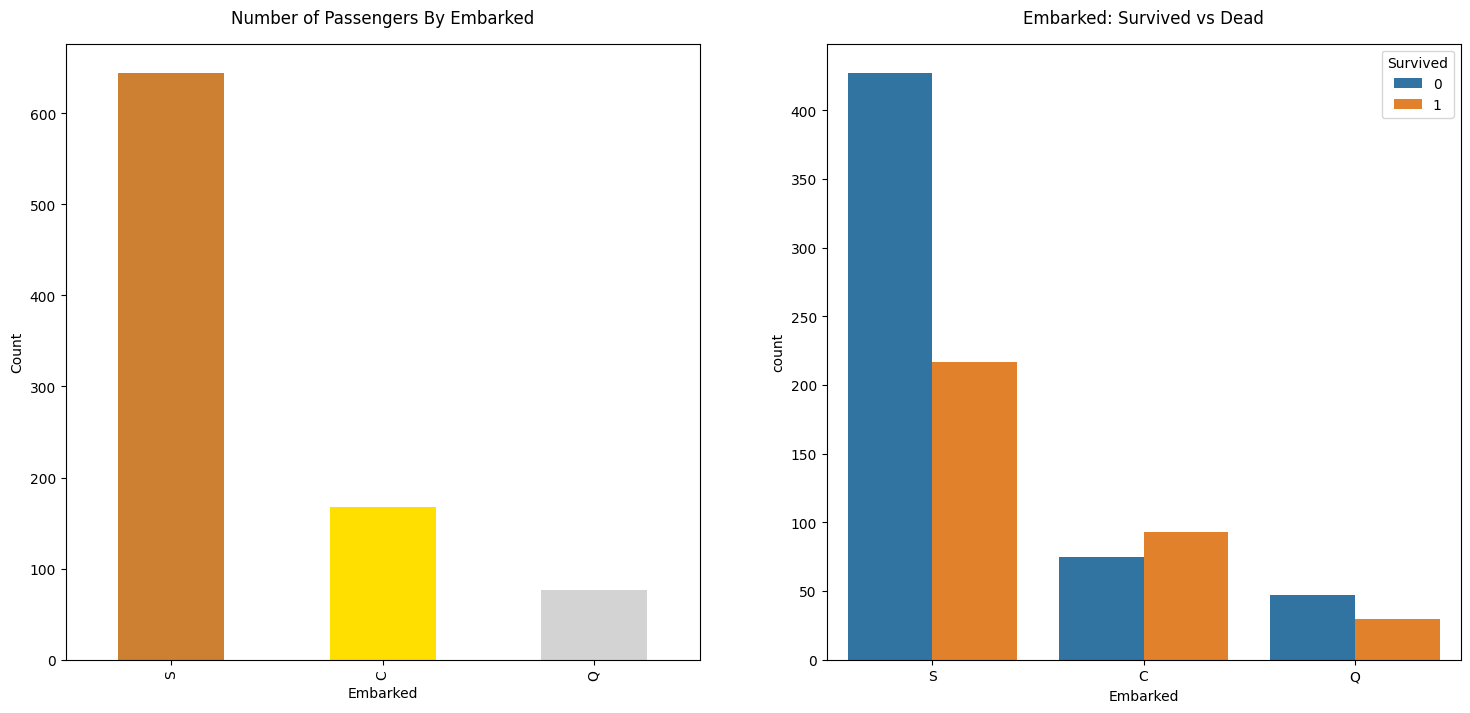

In [34]:
plot_survived('Embarked')

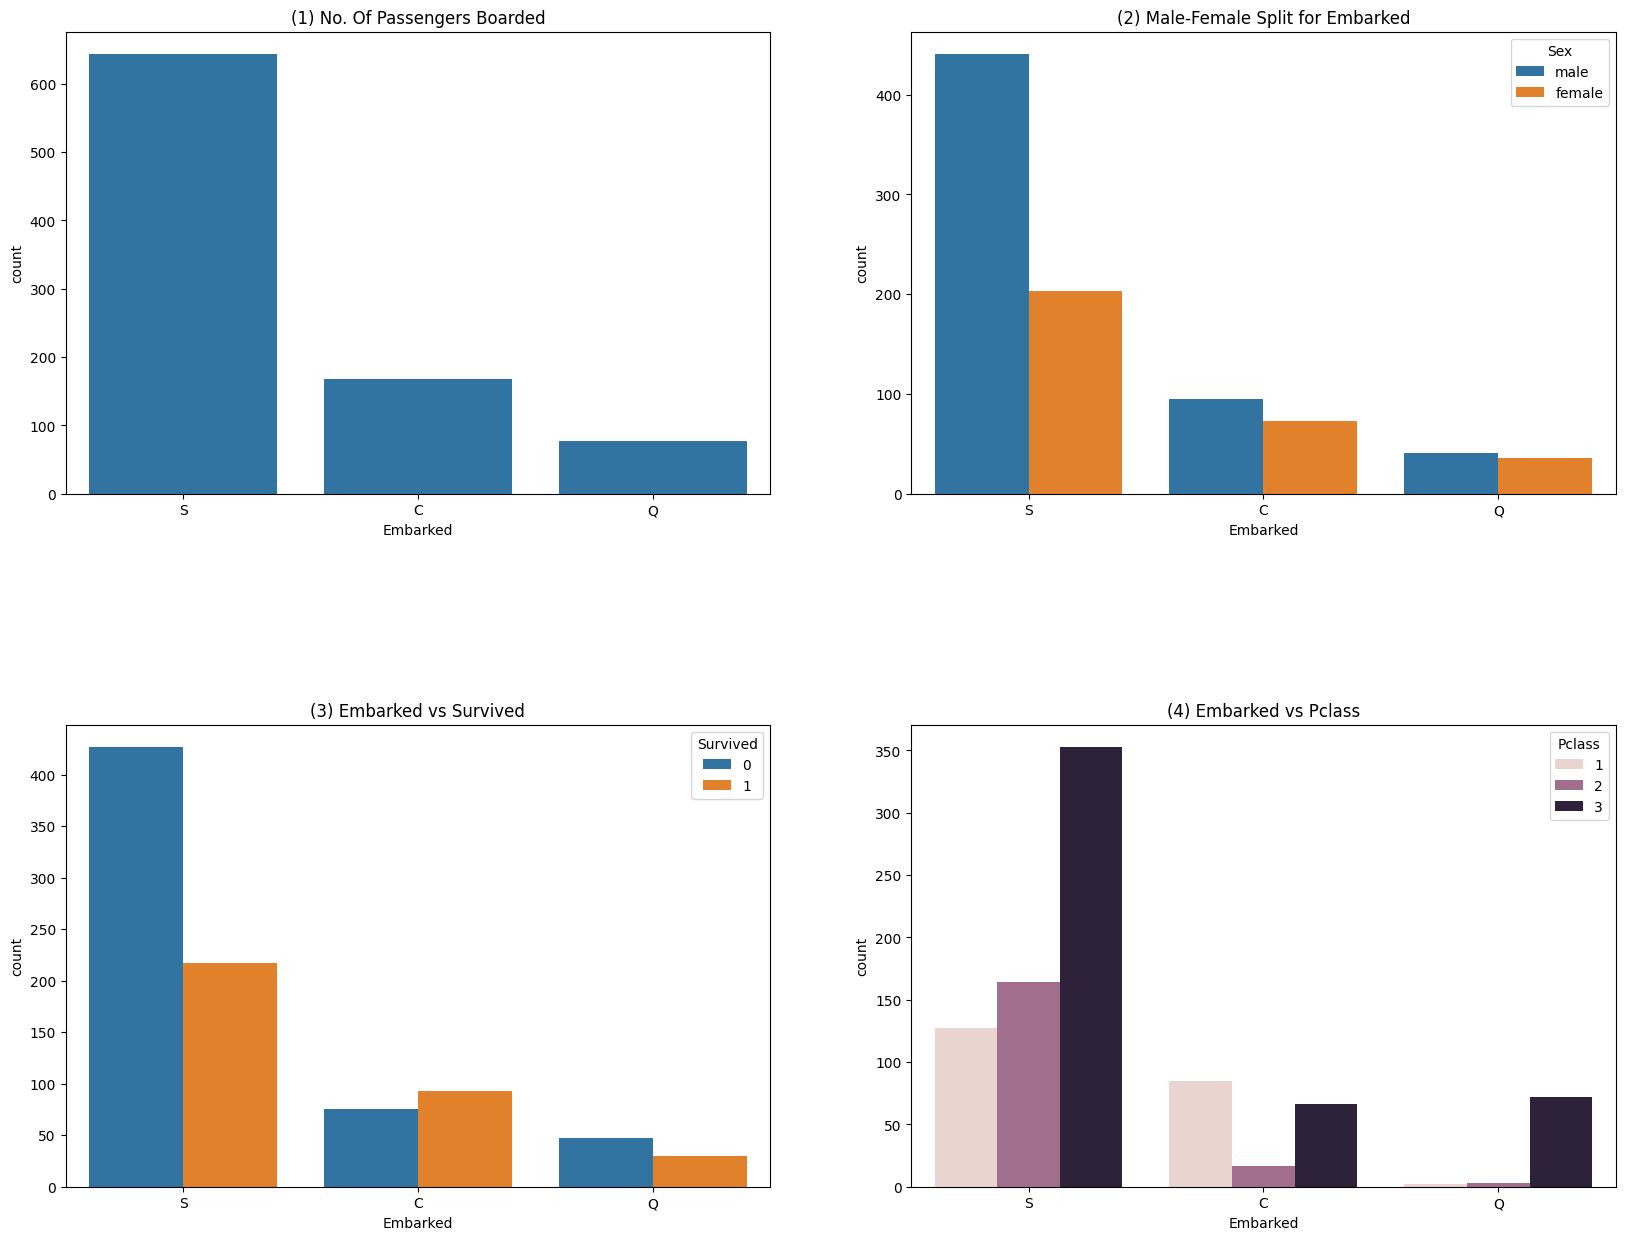

In [37]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x = 'Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x = 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Family = SibSP (형제, 자매) + Parch (부모, 자녀)

In [38]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

print("Maximum size of Family: ", df_train['Family'].max())
print("Minimum size of Family: ", df_train['Family'].min())

Maximum size of Family:  11
Minimum size of Family:  1


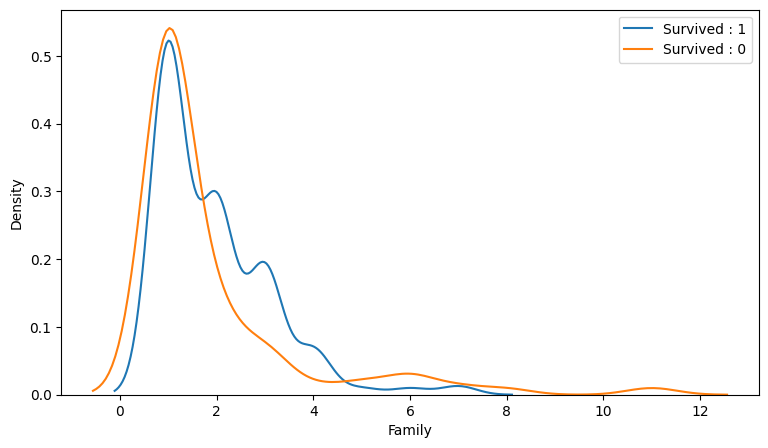

In [39]:
plt_continuous_histogram('Family')

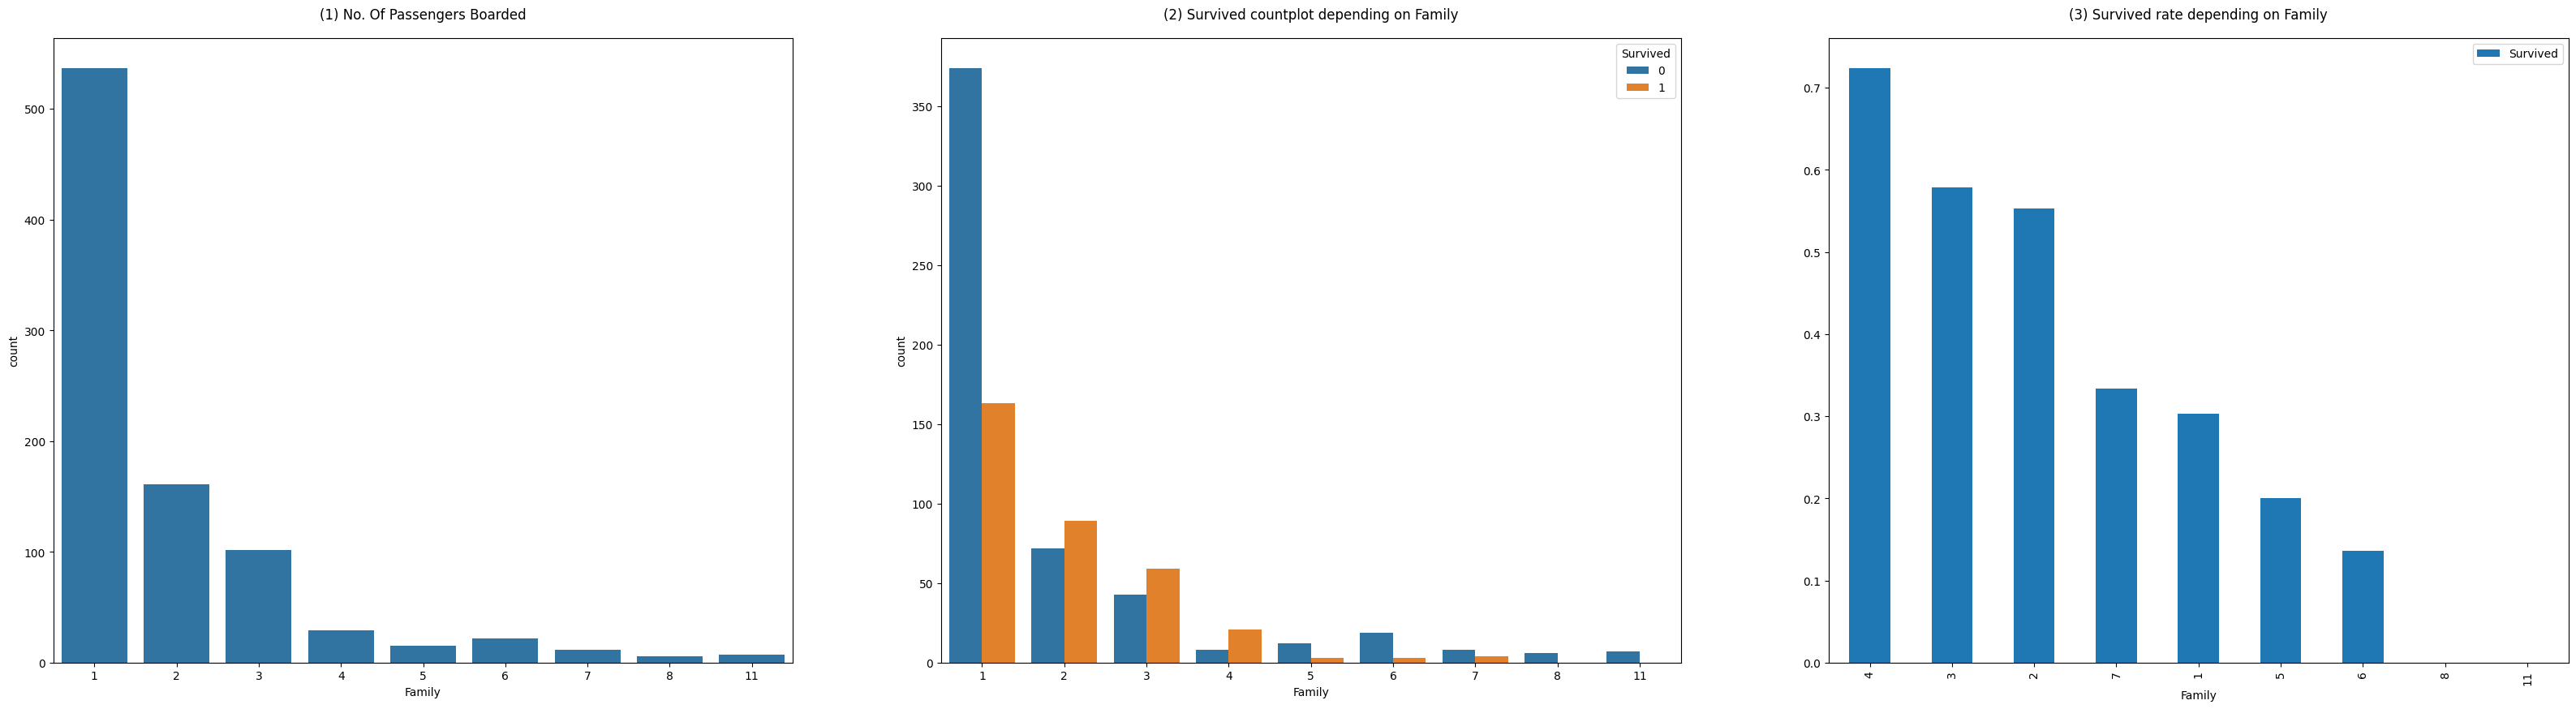

In [41]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x = 'Family', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x = 'Family', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on Family',  y=1.02)

df_train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Fare

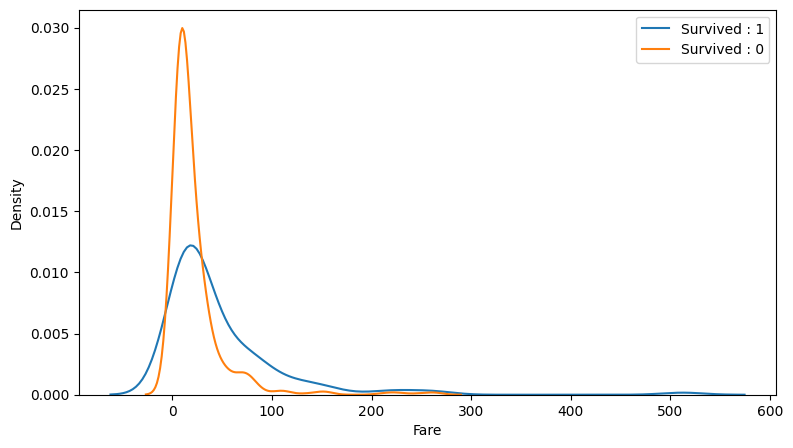

In [42]:
plt_continuous_histogram('Fare')

##### Cabin
* 결측치가 80%이상이므로 아래 **Feature Engineering - 결측치 처리** 에서 처리

In [43]:
df_train.shape

(891, 13)

In [44]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

##### Ticket

In [45]:
df_train['Ticket'].value_counts()

Ticket
1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
            ..
A/5 21172    1
349219       1
234818       1
345364       1
A/5 2466     1
Name: count, Length: 681, dtype: int64

#### Feature Engineering

##### 결측치 처리

In [46]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [47]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
dtype: int64

###### Age
* 이름에 Miss, Mr, Mrs 등 여러 타이틀이 존재 -> 이를 이용해 나이 유추

In [49]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [50]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [51]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [52]:
df_train[['Name', 'Initial']].groupby('Initial').count()

Name
Initial       
Capt         1
Col          2
Countess     1
Don          1
Dr           7
Jonkheer     1
Lady         1
Major        2
Master      40
Miss       182
Mlle         2
Mme          1
Mr         517
Mrs        125
Ms           1
Rev          6
Sir          1

In [53]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [54]:
df_train[['Name', 'Initial']].groupby('Initial').count()

Name
Initial      
Master     40
Miss      186
Mr        529
Mrs       127
Other       9

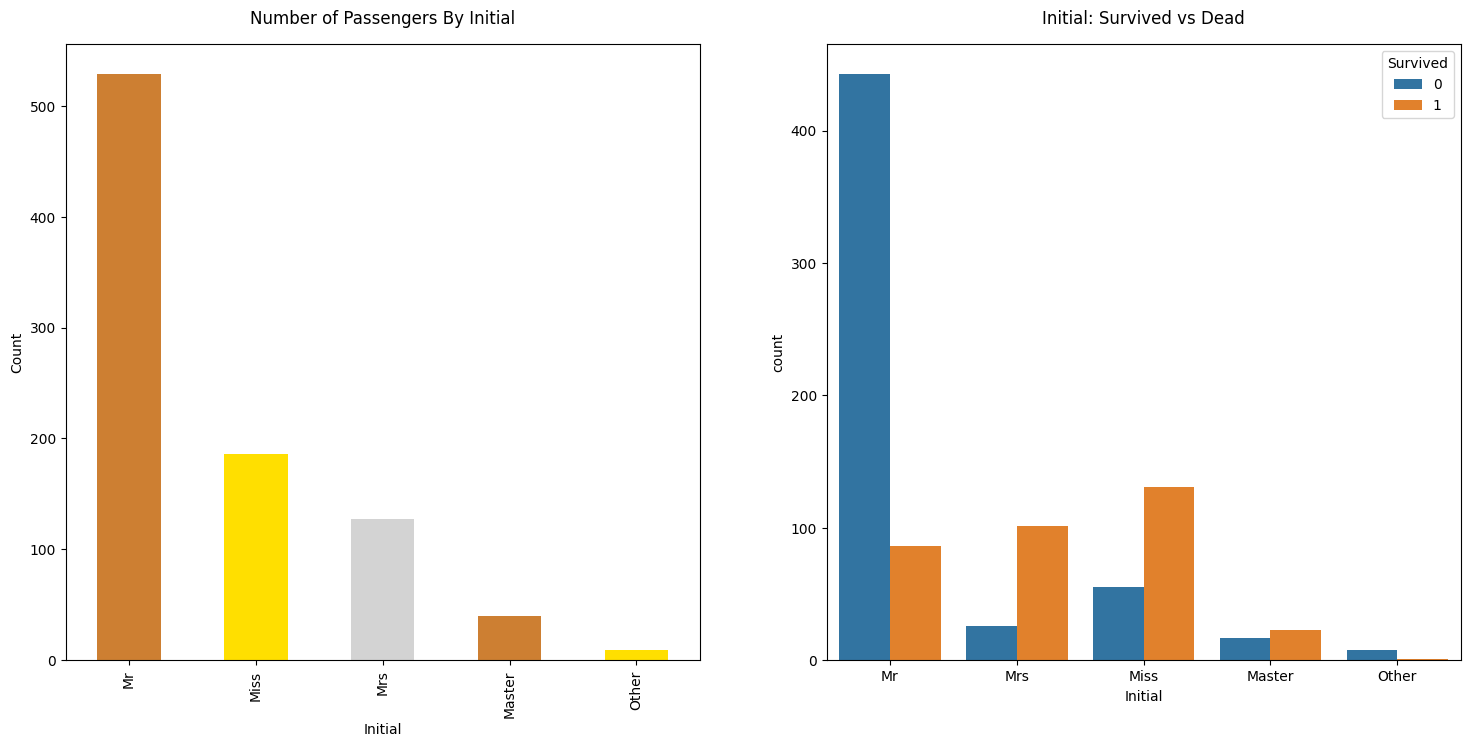

In [55]:
plot_survived('Initial')

In [57]:
df_train.groupby('Initial').mean(numeric_only=True)

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Initial                                                                   
Master    414.975000  0.575000  2.625000   4.574167  2.300000  1.375000   
Miss      411.741935  0.704301  2.284946  21.860000  0.698925  0.537634   
Mr        455.880907  0.162571  2.381853  32.739609  0.293006  0.151229   
Mrs       456.393701  0.795276  1.984252  35.981818  0.692913  0.818898   
Other     564.444444  0.111111  1.666667  45.888889  0.111111  0.111111   

              Fare    Family  
Initial                       
Master   34.703125  4.675000  
Miss     43.937188  2.236559  
Mr       24.939822  1.444234  
Mrs      45.420603  2.511811  
Other    19.102778  1.222222

In [58]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

###### Embarked

In [59]:
df_train['Embarked'].isnull().sum()

2

In [60]:
df_train['Embarked'].fillna('S', inplace=True)

###### Cabin
* 결측치 수가 너무 많기 때문에 해당 열은 제거

In [61]:
print(df_train['Cabin'].isnull().sum())
print(df_test['Cabin'].isnull().sum())

687
327


In [62]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [63]:
df_train.drop?

In [64]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Family Initial  
0      0         A/5 21171   7.2500        S       2      Mr  
1      0          PC 17599  71.2833        C       2     Mrs  
2      0  STON/O2. 3101282   7.9250        S       1    Miss  
3      0            113803  53.1000        S       2     Mrs  
4      0            373450   8.0500        S       1      Mr

##### 데이터 형식 & 분포 변경

###### Age : continuous -> categorical

In [65]:
'''
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7
'''

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [66]:
df_train.apply?

In [67]:
df_train.drop('Age', axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

In [68]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare Embarked  Family Initial  Age_cat  
0         A/5 21171   7.2500        S       2      Mr        2  
1          PC 17599  71.2833        C       2     Mrs        3  
2  STON/O2. 3101282   7.9250        S       1    Miss        2  
3            113803  53.1000        S       2     Mrs        3  
4            373450   8.0500        S       1      Mr        3

###### Initial, Embarked, Sex : str to numerical

In [69]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare Embarked  Family Initial  Age_cat  
0         A/5 21171   7.2500        S       2      Mr        2  
1          PC 17599  71.2833        C       2     Mrs        3  
2  STON/O2. 3101282   7.9250        S       1    Miss        2  
3            113803  53.1000        S       2     Mrs        3  
4            373450   8.0500        S       1      Mr        3

In [70]:
# Initial
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [71]:
# Embarked
print(df_train['Embarked'].unique())
print(df_train['Embarked'].value_counts())

['S' 'C' 'Q']
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [86]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

KeyError: 'Embarked'

In [73]:
# Sex
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [74]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0      1      0   
2                             Heikkinen, Miss. Laina    0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0      1      0   
4                           Allen, Mr. William Henry    1      0      0   

             Ticket     Fare  Embarked  Family  Initial  Age_cat  
0         A/5 21171   7.2500         2       2        2        2  
1          PC 17599  71.2833         0       2        3        3  
2  STON/O2. 3101282   7.9250         2       1        1        2  
3            113803  53.1000         2       2        3        3  
4            373450   8.0500         2       1        2        3

###### Fare : with log

In [75]:
df_train['Fare_log'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare_log'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

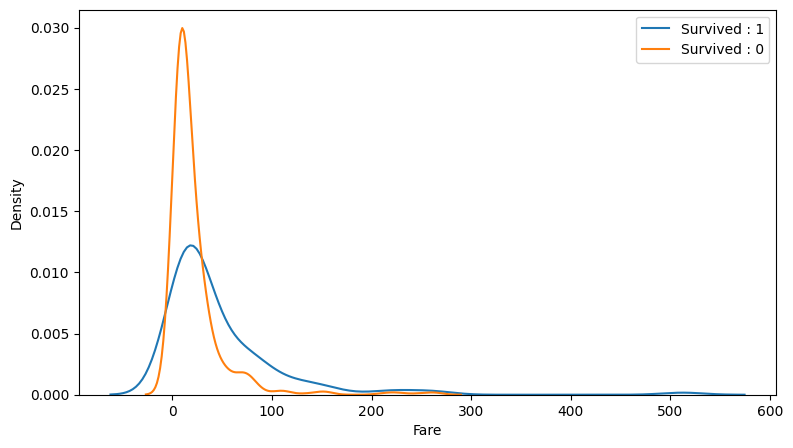

In [76]:
plt_continuous_histogram('Fare')

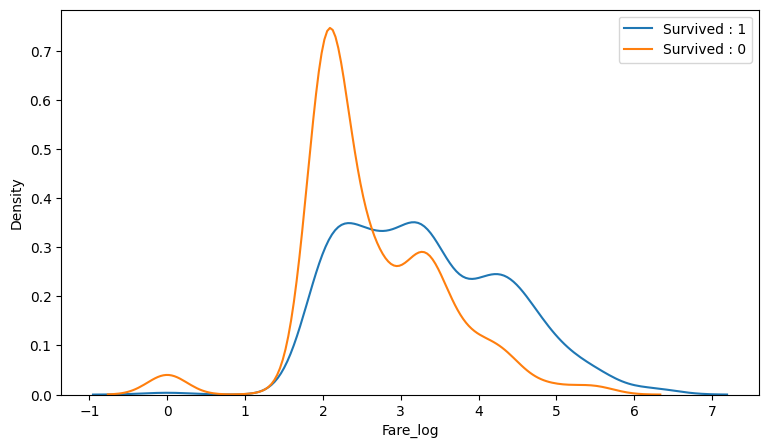

In [77]:
plt_continuous_histogram('Fare_log')

##### One-hot encoding

###### Initial
|  | Initial_Master | Initial_Miss | Initial_Mr | Initial_Mrs | Initial_Other |
| --- | --- | --- | --- | --- | --- |
| Master | 1 | 0 | 0 | 0 | 0 |
| Miss | 0 | 1 | 0 | 0 | 0 |
| Mr | 0 | 0 | 1 | 0 | 0 |
| Mrs | 0 | 0 | 0 | 1 | 0 |
| Other | 0 | 0 | 0 | 0 | 1 |

In [78]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [79]:
pd.get_dummies?

In [80]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0      1      0   
2                             Heikkinen, Miss. Laina    0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0      1      0   
4                           Allen, Mr. William Henry    1      0      0   

             Ticket     Fare  Embarked  Family  Age_cat  Fare_log  Initial_0  \
0         A/5 21171   7.2500         2       2        2  1.981001      False   
1          PC 17599  71.2833         0       2        3  4.266662      False   
2  STON/O2. 3101282   7.9250         2       1        2  2.070022      False   
3            113803  53.1000         2       2        3  3.972177      False   
4            373450   8.0500         2       1        3  2.085672      False   

   Initial_1  Initial_2  Initial_3  Initial_4  
0      False       True      False      False  
1      False      False       True      False  
2       True      False      False      False  
3      False      False       True      False  
4      False       True      False      False

###### Embarked

In [88]:
df_train.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Family', 'Age_cat', 'Fare_log', 'Initial_0', 'Initial_1',
       'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1',
       'Embarked_2', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [87]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

##### Pclass

In [84]:
df_train = pd.get_dummies(df_train, columns=['Pclass'], prefix='Pclass')
df_test = pd.get_dummies(df_test, columns=['Pclass'], prefix='Pclass')

In [85]:
df_train.head()

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex  SibSp  Parch            Ticket     Fare  Family  Age_cat  ...  \
0    1      1      0         A/5 21171   7.2500       2        2  ...   
1    0      1      0          PC 17599  71.2833       2        3  ...   
2    0      0      0  STON/O2. 3101282   7.9250       1        2  ...   
3    0      1      0            113803  53.1000       2        3  ...   
4    1      0      0            373450   8.0500       1        3  ...   

   Initial_1  Initial_2  Initial_3  Initial_4  Embarked_0  Embarked_1  \
0      False       True      False      False       False       False   
1      False      False       True      False        True       False   
2       True      False      False      False       False       False   
3      False      False       True      False       False       False   
4      False       True      False      False       False       False   

   Embarked_2  Pclass_1  Pclass_2  Pclass_3  
0        True     False     False      True  
1       False      True     False     False  
2        True     False     False      True  
3        True      True     False     False  
4        True     False     False      True  

[5 rows x 22 columns]

##### Drop no longer needed columns

In [89]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Fare', 'Parch', 'Ticket'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Fare', 'Parch', 'Ticket'], axis=1, inplace=True)

In [90]:
df_train.head()

Survived  Sex  Family  Age_cat  Fare_log  Initial_0  Initial_1  Initial_2  \
0         0    1       2        2  1.981001      False      False       True   
1         1    0       2        3  4.266662      False      False      False   
2         1    0       1        2  2.070022      False       True      False   
3         1    0       2        3  3.972177      False      False      False   
4         0    1       1        3  2.085672      False      False       True   

   Initial_3  Initial_4  Embarked_0  Embarked_1  Embarked_2  Pclass_1  \
0      False      False       False       False        True     False   
1       True      False        True       False       False      True   
2      False      False       False       False        True     False   
3       True      False       False       False        True      True   
4      False      False       False       False        True     False   

   Pclass_2  Pclass_3  
0     False      True  
1     False     False  
2     False      True  
3     False     False  
4     False      True

In [91]:
df_test.head()

Sex  Family  Age_cat  Fare_log  Initial_0  Initial_1  Initial_2  Initial_3  \
0    1       1        3  2.057860      False      False       True      False   
1    0       2        4  1.945910      False      False      False       True   
2    1       1        6  2.270836      False      False       True      False   
3    1       1        2  2.159003      False      False       True      False   
4    0       3        2  2.508582      False      False      False       True   

   Initial_4  Embarked_0  Embarked_1  Embarked_2  Pclass_1  Pclass_2  Pclass_3  
0      False       False        True       False     False     False      True  
1      False       False       False        True     False     False      True  
2      False       False        True       False     False      True     False  
3      False       False       False        True     False     False      True  
4      False       False       False        True     False     False      True

In [92]:
df_train = pd.get_dummies(df_train, columns=['Sex'], prefix='Sex')
df_test = pd.get_dummies(df_test, columns=['Sex'], prefix='Sex')

In [93]:
df_train = pd.get_dummies(df_train, columns=['Family'], prefix='Family')
df_test = pd.get_dummies(df_test, columns=['Family'], prefix='Family')

In [94]:
df_train = pd.get_dummies(df_train, columns=['Age_cat'], prefix='Age_cat')
df_test = pd.get_dummies(df_test, columns=['Age_cat'], prefix='Age_cat')

In [95]:
df_train.head()

Survived  Fare_log  Initial_0  Initial_1  Initial_2  Initial_3  Initial_4  \
0         0  1.981001      False      False       True      False      False   
1         1  4.266662      False      False      False       True      False   
2         1  2.070022      False       True      False      False      False   
3         1  3.972177      False      False      False       True      False   
4         0  2.085672      False      False       True      False      False   

   Embarked_0  Embarked_1  Embarked_2  ...  Family_8  Family_11  Age_cat_0  \
0       False       False        True  ...     False      False      False   
1        True       False       False  ...     False      False      False   
2       False       False        True  ...     False      False      False   
3       False       False        True  ...     False      False      False   
4       False       False        True  ...     False      False      False   

   Age_cat_1  Age_cat_2  Age_cat_3  Age_cat_4  Age_cat_5  Age_cat_6  Age_cat_7  
0      False       True      False      False      False      False      False  
1      False      False       True      False      False      False      False  
2      False       True      False      False      False      False      False  
3      False      False       True      False      False      False      False  
4      False      False       True      False      False      False      False  

[5 rows x 32 columns]

## Training

### Build trainset & testset

In [96]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [97]:
X = df_train.drop('Survived', axis=1).values
Y = df_train['Survived'].values

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
print('X_train :', X_train.shape)
print('X_val :', X_val.shape)
print('Y_train :', Y_train.shape)
print('Y_val :', Y_val.shape)

X_train : (712, 31)
X_val : (179, 31)
Y_train : (712,)
Y_val : (179,)


### Linear Regression


In [98]:
from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier()
model1.fit(X_train, Y_train)
pred = model1.predict(X_val)

print('Accuracy : {:.2f}%'.format(100 * metrics.accuracy_score(pred, Y_val)))

Accuracy : 84.92%


### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, Y_train)
pred = model2.predict(X_val)

print('Accuracy : {:.2f}%'.format(100 * metrics.accuracy_score(pred, Y_val)))

Accuracy : 84.36%


### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, Y_train)
pred = model3.predict(X_val)

print('Accuracy : {:.2f}%'.format(100 * metrics.accuracy_score(pred, Y_val)))

Accuracy : 82.68%


### Multi-layer Perceptron

In [ ]:
X_train.shape

(712, 31)

In [104]:
# Convert X_train and X_val to numeric dtype, e.g., float32
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

model4 = tf.keras.Sequential([
    Dense(32, input_shape=(31,)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid')
])

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model4.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)

pred = model4.predict(X_val)
print('Accuracy : {:.2f}%'.format(100 * metrics.accuracy_score((pred > .5).astype(int), Y_val)))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy : 83.24%


## Submission

In [105]:
print(df_test.shape)
df_test.head()

(418, 31)


Fare_log  Initial_0  Initial_1  Initial_2  Initial_3  Initial_4  \
0  2.057860      False      False       True      False      False   
1  1.945910      False      False      False       True      False   
2  2.270836      False      False       True      False      False   
3  2.159003      False      False       True      False      False   
4  2.508582      False      False      False       True      False   

   Embarked_0  Embarked_1  Embarked_2  Pclass_1  ...  Family_8  Family_11  \
0       False        True       False     False  ...     False      False   
1       False       False        True     False  ...     False      False   
2       False        True       False     False  ...     False      False   
3       False       False        True     False  ...     False      False   
4       False       False        True     False  ...     False      False   

   Age_cat_0  Age_cat_1  Age_cat_2  Age_cat_3  Age_cat_4  Age_cat_5  \
0      False      False      False       True      False      False   
1      False      False      False      False       True      False   
2      False      False      False      False      False      False   
3      False      False       True      False      False      False   
4      False      False       True      False      False      False   

   Age_cat_6  Age_cat_7  
0      False      False  
1      False      False  
2       True      False  
3      False      False  
4      False      False  

[5 rows x 31 columns]

In [107]:
submission = pd.read_csv('./gender_submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [106]:
X_test = df_test.values

In [112]:
submission.to_csv('./submission.csv', index=False)

# Deep Learning


## Classification

### Load MedNIST dataset

In [ ]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz

--2020-10-10 01:22:30--  https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62087736 (59M) [application/octet-stream]
Saving to: ‘mednist.tar.gz’

mednist.tar.gz      100%[===================>]  59.21M   114MB/s    in 0.5s    

2020-10-10 01:22:31 (114 MB/s) - ‘mednist.tar.gz’ saved [62087736/62087736]



In [ ]:
# 압축 풀기
!tar xzf mednist.tar.gz

In [ ]:
import os
import cv2
import glob
import time
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
dataDir = 'resized'                                         # 데이터 위치
classNames = sorted(os.listdir(dataDir))                    # 각 클래스의 이름들
numClass = len(classNames)                                  # Number of classes = number of subdirectories
imageFiles = [[os.path.join(dataDir,classNames[i],x)
              for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]                     # 각 클래스 별 파일 이름들
numEach = [len(imageFiles[i]) for i in range(numClass)]     # 각 클래스 별 파일 갯수
imageFilesList = []                                         # 모든 파일이름
imageClass = []                                             # 각각의 파일들에 대한 클래스

for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])

numTotal = len(imageClass)                                            # 전체 파일 갯수
imageWidth, imageHeight = Image.open(imageFilesList[0]).size          # 각 영상의 사이즈(width, height)

print("There are", numTotal,"images in", numClass, "distinct categories")
print("Label names:", classNames)
print("Label counts:", numEach)
print("Image dimensions:", imageWidth,"x", imageHeight)

There are 58954 images in 6 distinct categories
Label names: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label counts: [10000, 8954, 10000, 10000, 10000, 10000]
Image dimensions: 64 x 64


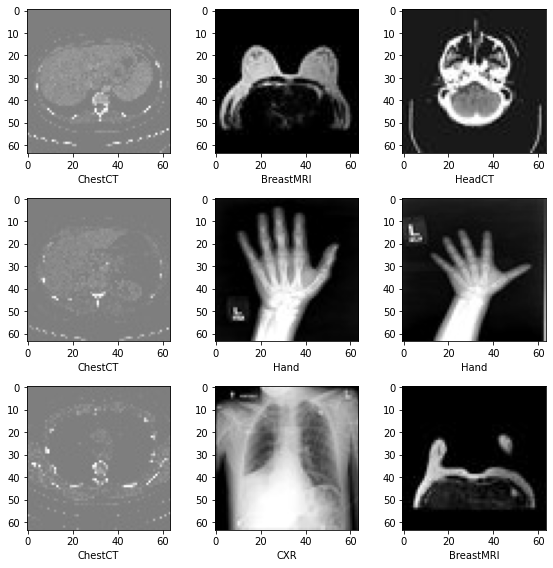

In [ ]:
# 전체 이미지 중 9개를 랜덤으로 골라 3x3으로 레이블과 함께 그리기
# -- 여러번 실행하며 이미지들을 살펴보세요 --

plt.subplots(3,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=9)):
    im = Image.open(imageFilesList[k])
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(classNames[imageClass[k]])
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

In [ ]:
# 이미지 리스트 살펴보기
imageFilesList[:5]

['resized/AbdomenCT/001388.jpeg',
 'resized/AbdomenCT/004686.jpeg',
 'resized/AbdomenCT/005143.jpeg',
 'resized/AbdomenCT/004467.jpeg',
 'resized/AbdomenCT/006448.jpeg']

### Generator

In [ ]:
imageFilesList = np.array(imageFilesList)
imageClass = np.array(imageClass)

In [ ]:
for path, label in zip(imageFilesList[:5], imageClass[:5]):
  print(path, label)
print(classNames, np.unique(imageClass))

resized/AbdomenCT/001388.jpeg 0
resized/AbdomenCT/004686.jpeg 0
resized/AbdomenCT/005143.jpeg 0
resized/AbdomenCT/004467.jpeg 0
resized/AbdomenCT/006448.jpeg 0
['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT'] [0 1 2 3 4 5]


In [ ]:
# 5-fold cross-validation
split = 0.2
train_path = []
train_class = []
val_path = []
val_class = []
test_path = []
test_class = []
for l in np.unique(imageClass):
  label_idx = np.where(imageClass == l)
  label_path = imageFilesList[label_idx]
  label_class = imageClass[label_idx]

  test_path += label_path[:int(len(label_path)*split)].tolist()
  test_class += label_class[:int(len(label_class)*split)].tolist()
  val_path += label_path[int(len(label_path)*split):int(len(label_path)*split*2)].tolist()
  val_class += label_class[int(len(label_class)*split):int(len(label_class)*split*2)].tolist()
  train_path += label_path[int(len(label_path)*split*2):].tolist()
  train_class += label_class[int(len(label_class)*split*2):].tolist()

In [ ]:
print(len(train_class), len(val_class), len(test_class))
for name, dataset in zip(['train', 'val', 'test'],
                         [train_class, val_class, test_class]):
  print(name)
  for l in np.unique(imageClass):
    print(f'{l} :', (np.array(dataset) == l).sum(), end=' | ')
  print()

35373 11791 11790
train
0 : 6000 | 1 : 5373 | 2 : 6000 | 3 : 6000 | 4 : 6000 | 5 : 6000 | 
val
0 : 2000 | 1 : 1791 | 2 : 2000 | 3 : 2000 | 4 : 2000 | 5 : 2000 | 
test
0 : 2000 | 1 : 1790 | 2 : 2000 | 3 : 2000 | 4 : 2000 | 5 : 2000 | 


### Set hyperparameter

In [ ]:
batch_size = 32
c = len(np.unique(imageClass))
epochs = 10
steps_per_epoch = len(train_path) // batch_size
validation_steps = len(val_path) // batch_size

### Load VGG16
![대체 텍스트](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

In [ ]:
base_model.output, base_model.input

(<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>,
 <tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>)

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model

classes = 6
# VGG16 모델 불러오기
base_model = vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(classes, activation='softmax')(x)
model = Model(base_model.input, x)


# 모델의 모양을 보여준다.
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

### Set generator

In [ ]:
def get_generator(data_path, data_class, batch_size=32, classes=6, shuffle=True):
  def fetch_dataset(path, y):
    x = tf.io.read_file(path)
    return tf.data.Dataset.from_tensors((x, y))

  def augmentation(img, label, shape):
    img = tf.image.resize(img, (224, 224), tf.image.ResizeMethod.BICUBIC)
    img = tf.cast(img, tf.float32)
    img /=127.5
    img -= 1.

    # one-hot encodding
    label = tf.one_hot(label, classes)
    return img, label

  def preprocess_image(img, label):
    shape = tf.image.extract_jpeg_shape(img)
    img = tf.io.decode_jpeg(img, channels=3)
    img, label = augmentation(img, label, shape)
    return (img, label)

  dataset = tf.data.Dataset.from_tensor_slices((data_path, data_class))
  dataset = dataset.repeat()
  if shuffle:
    dataset = dataset.shuffle(len(data_path))
  dataset = dataset.interleave(fetch_dataset, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  dataset = dataset.batch(batch_size)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [ ]:
train_generator = get_generator(train_path, train_class, batch_size, classes)
val_generator = get_generator(val_path, val_class, batch_size, classes, shuffle=False)
test_generator = get_generator(test_path, test_class, batch_size, classes, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 224, 224, 3) tf.Tensor(-1.1728123, shape=(), dtype=float32) tf.Tensor(1.2491114, shape=(), dtype=float32) (32, 6)
(32, 224, 224, 3) tf.Tensor(-1.1590811, shape=(), dtype=float32) tf.Tensor(1.2189019, shape=(), dtype=float32) (32, 6)
(32, 224, 224, 3) tf.Tensor(-1.1444199, shape=(), dtype=float32) tf.Tensor(1.2183414, shape=(), dtype=float32) (32, 6)
(32, 224, 224, 3) tf.Tensor(-1.1733379, shape=(), dtype=float32) tf.Tensor(1.1932297, shape=(), dtype=float32) (32, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 224, 224, 3) tf.Tensor(-1.1836872, shape=(), dtype=float32) tf.Tensor(1.1799705, shape=(), dtype=float32) (32, 6)


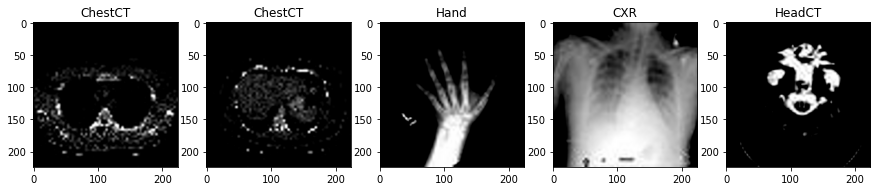

In [ ]:
plt.figure(figsize=(15,15))
for i, t in enumerate(train_generator.take(5)):
  print(t[0].shape, tf.reduce_min(t[0]), tf.reduce_max(t[0]), t[1].shape)
  plt.subplot(1,5,i+1)
  plt.imshow(t[0][0])
  plt.title(classNames[tf.argmax(t[1][0])])
plt.show()

In [ ]:
tf.keras.callbacks.Callback.__dir__()

TypeError: ignored

In [ ]:
class CustomLog(Callback):
    def on_end_epoch

In [ ]:
history = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1,)

Epoch 1/10
 121/1105 [==>...........................] - ETA: 6:38 - loss: 0.1101 - acc: 0.9659

KeyboardInterrupt: ignored

# Techniques

In [ ]:
!pip install tensorflow-addons==0.11.2

     |████████████████████████████████| 1.1MB 4.9MB/s 
  Found existing installation: tensorflow-addons 0.8.3
    Uninstalling tensorflow-addons-0.8.3:
      Successfully uninstalled tensorflow-addons-0.8.3


In [ ]:
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
import torch
import torchvision
from PIL import Image

## Augmentation
* Affine Transformation
  * Flip, Crop, Resize, Shift, Rotate, ...
* Histogram
  * Color : Contrast, Brightness, Hue, ...
  * Histogram : Gamma correction, Histogram Equalization, Noise, ...
* Regularization
  * Cutout
  * Mixup
  * CutMix

In [ ]:
def plot_images(imgtuple, imgname):
  assert len(imgtuple) == len(imgname)
  plt.figure(figsize=(20,20))
  for i in range(len(imgtuple)):
    plt.subplot(1,len(imgtuple),i+1)
    plt.imshow(imgtuple[i])
    plt.title(imgname[i])
  plt.show()

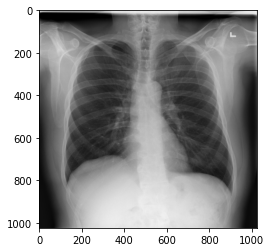

In [ ]:
# https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation
img = cv2.imread('./cxr_example.png')
plt.imshow(img)

### Affine Transformation

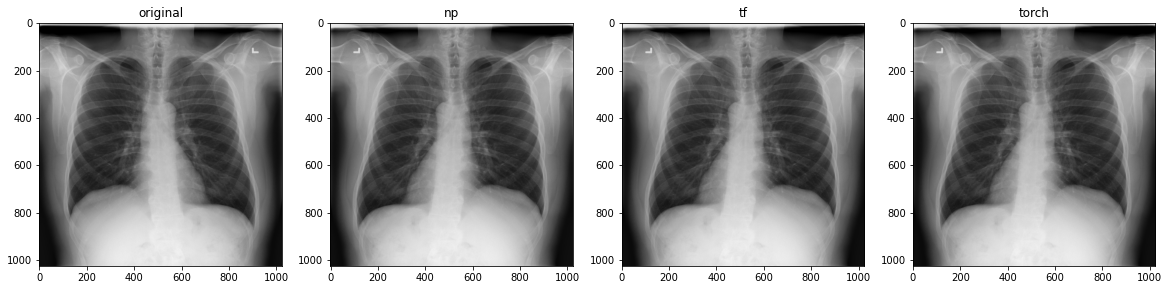

In [ ]:
# flip
flip_np = img[:,::-1]
flip_tf = tf.image.flip_left_right(img)
flip_torch = torchvision.transforms.functional.hflip(Image.fromarray(img))
plot_images((img, flip_np, flip_tf, flip_torch), ('original', 'np', 'tf', 'torch'))

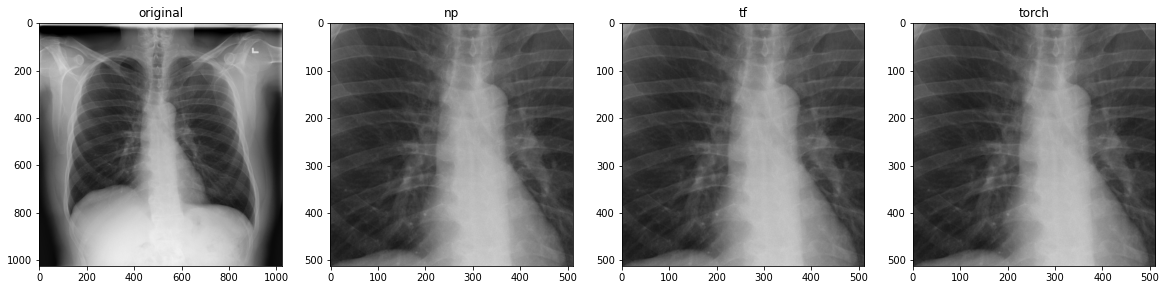

In [ ]:
# crop
bbox = [0.2, 0.2, 0.5, 0.5] # left_top_x, left_top_y, width, height
shape = img.shape
crop_np = img[int(shape[0]*bbox[1]):int(shape[0]*bbox[1])+int(shape[1]*bbox[3]),
              int(shape[1]*bbox[0]):int(shape[1]*bbox[0])+int(shape[1]*bbox[2])]
crop_tf = tf.image.crop_to_bounding_box(img, int(shape[0]*bbox[1]), int(shape[1]*bbox[0]), int(shape[1]*bbox[3]), int(shape[1]*bbox[2]))
crop_torch = torchvision.transforms.functional.crop(Image.fromarray(img), int(shape[0]*bbox[1]), int(shape[1]*bbox[0]), int(shape[1]*bbox[3]), int(shape[1]*bbox[2]))
plot_images((img, crop_np, crop_tf, crop_torch), ('original', 'np', 'tf', 'torch'))

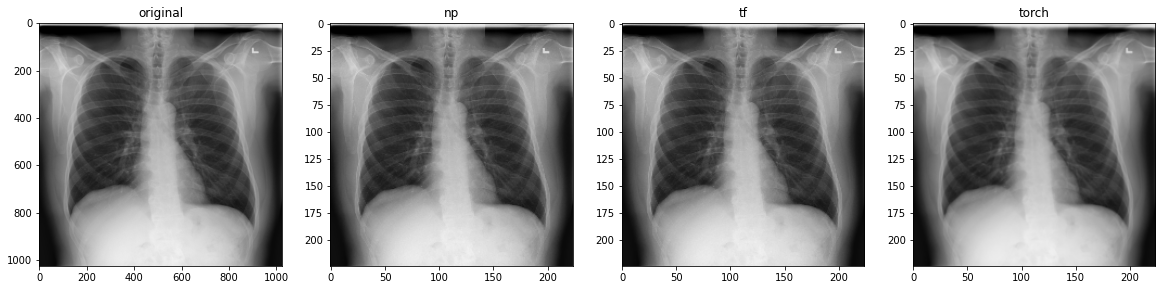

In [ ]:
# resize
imgsize = 224
resize_np = cv2.resize(img, (imgsize, imgsize))
resize_tf = tf.saturate_cast(tf.image.resize(img, (imgsize, imgsize)), tf.uint8)
resize_torch = torchvision.transforms.functional.resize(Image.fromarray(img), [imgsize, imgsize])
plot_images((img, resize_np, resize_tf, resize_torch), ('original', 'np', 'tf', 'torch'))

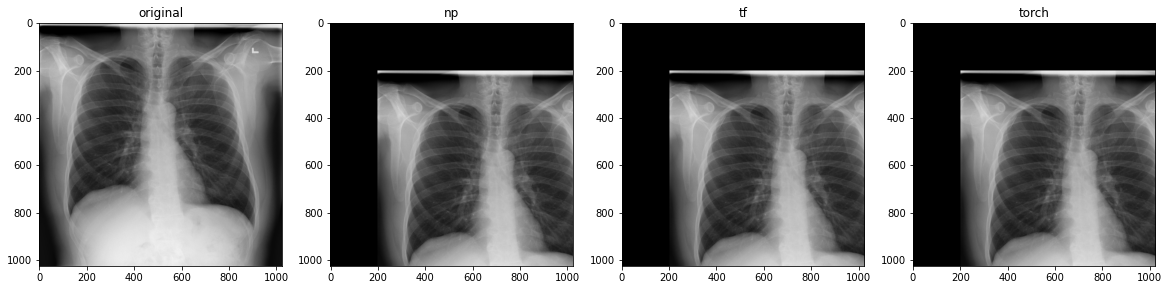

In [ ]:
# shift
shift = [200, 200] # x, y
M = np.array([[1, 0, shift[0]], [0, 1, shift[1]]], dtype=np.float32)
shape = img.shape
shift_np = cv2.warpAffine(img, M, shape[:2])
shift_tf = tfa.image.translate(img, shift)
shift_torch = torchvision.transforms.functional.affine(Image.fromarray(img), angle=0, translate=shift, scale=1, shear=0)
plot_images((img, shift_np, shift_tf, shift_torch), ('original', 'np', 'tf', 'torch'))

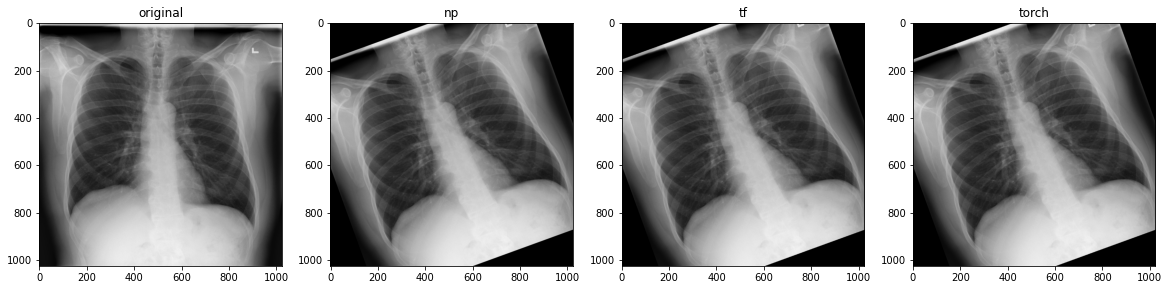

In [ ]:
# rotate
angle = 20
shape = img.shape
M = cv2.getRotationMatrix2D((shape[1]//2, shape[0]//2), angle, 1) # degree
rotate_np = cv2.warpAffine(img, M, (shape[1], shape[0]))
rotate_tf = tfa.image.rotate(img, angle*np.pi/180) # radian
rotate_torch = torchvision.transforms.functional.rotate(Image.fromarray(img), angle) # degree
plot_images((img, rotate_np, rotate_tf, rotate_torch), ('original', 'np', 'tf', 'torch'))

### Histogram

In [ ]:
def plot_histogram(imgtuple, imgname):
  assert len(imgtuple) == len(imgname)
  plt.figure(figsize=(20,5))
  for i in range(len(imgtuple)):
    plt.subplot(1,len(imgtuple),i+1)
    plt.hist(imgtuple[i].flatten(), bins=255)
    plt.title(imgname[i])
  plt.show()

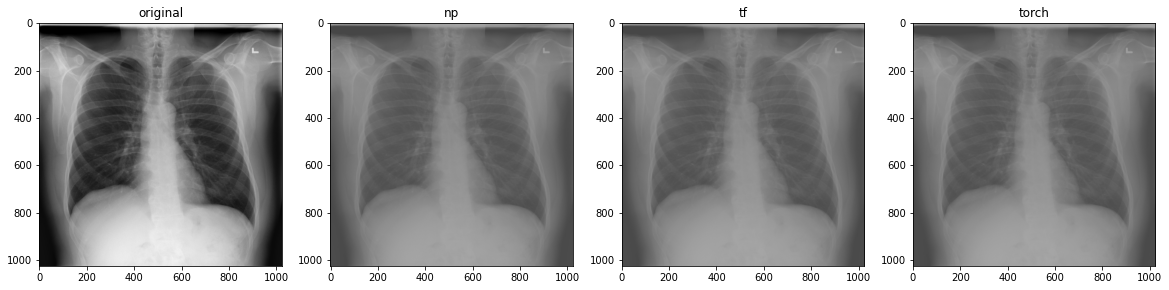

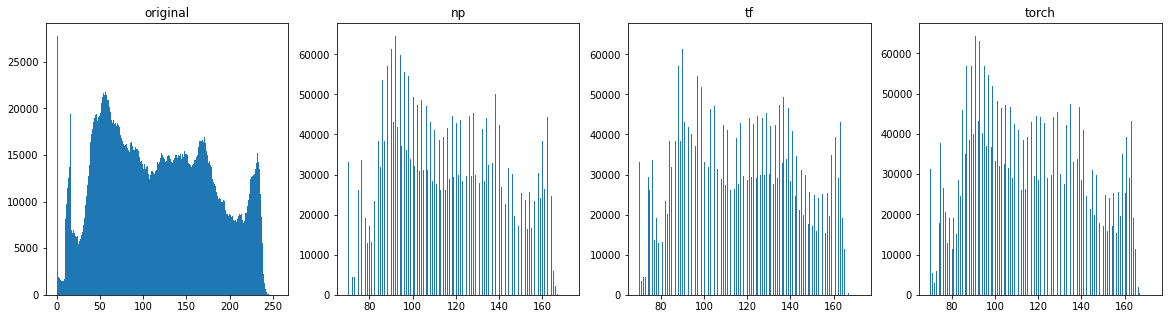

In [ ]:
# contrast
level = 0.4
contrast_np = (img * level + img.mean() * (1-level)).astype(np.uint8)
contrast_tf = tf.image.adjust_contrast(img, level)
contrast_torch = torchvision.transforms.functional.adjust_contrast(Image.fromarray(img), level)
plot_images((img, contrast_np, contrast_tf, contrast_torch), ('original', 'np', 'tf', 'torch'))
plot_histogram((img, contrast_np, contrast_tf.numpy(), np.array(contrast_torch)), ('original', 'np', 'tf', 'torch'))

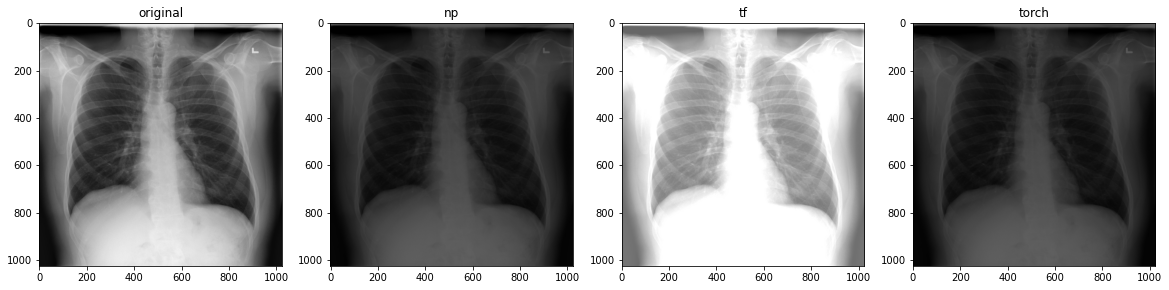

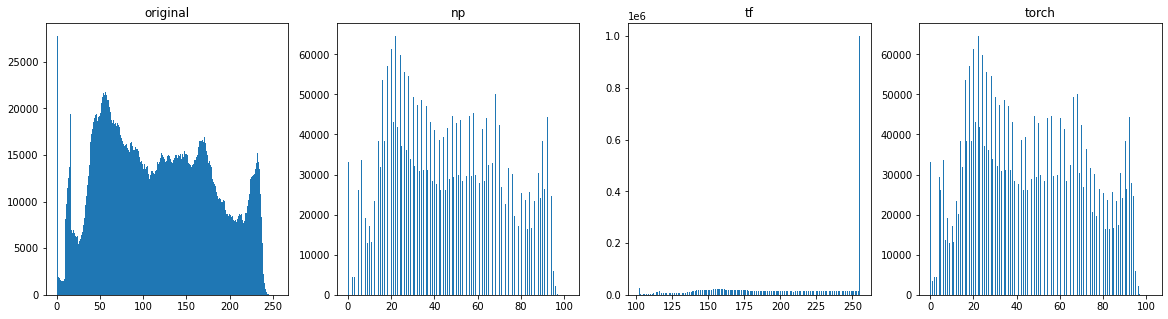

In [ ]:
# brightness
level = 0.4
brightness_np = (img * level).astype(np.uint8) # img * level
brightness_tf = tf.image.adjust_brightness(img, level) # img + level
brightness_torch = torchvision.transforms.functional.adjust_brightness(Image.fromarray(img), level) # img * level
plot_images((img, brightness_np, brightness_tf, brightness_torch), ('original', 'np', 'tf', 'torch'))
plot_histogram((img, brightness_np, brightness_tf.numpy(), np.array(brightness_torch)), ('original', 'np', 'tf', 'torch'))

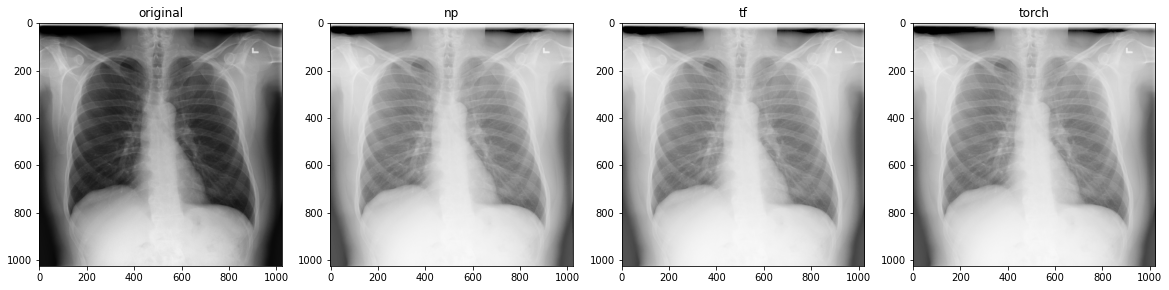

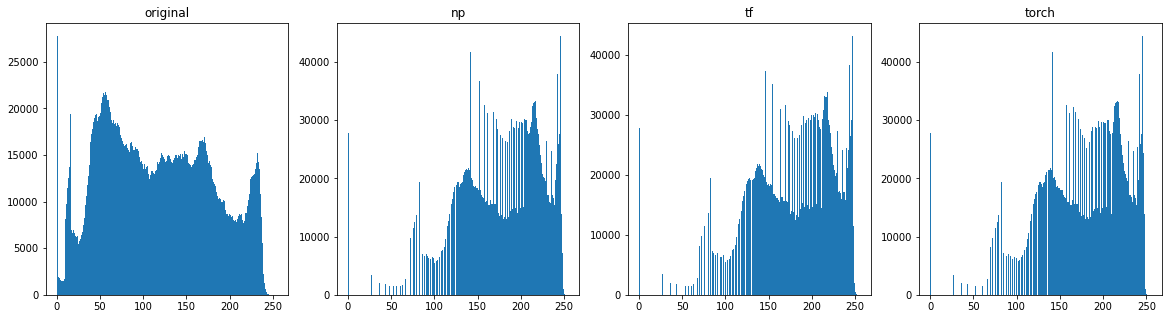

In [ ]:
# gamma
gamma = 0.4
gamma_np = (((img/255) ** gamma) * 255).astype(np.uint8)
gamma_tf = tf.image.adjust_gamma(img, gamma)
gamma_torch = torchvision.transforms.functional.adjust_gamma(Image.fromarray(img), gamma)
plot_images((img, gamma_np, gamma_tf, gamma_torch), ('original', 'np', 'tf', 'torch'))
plot_histogram((img, gamma_np, gamma_tf.numpy(), np.array(gamma_torch)), ('original', 'np', 'tf', 'torch'))

![대체 텍스트](https://opencv-python.readthedocs.io/en/latest/_images/image011.png)

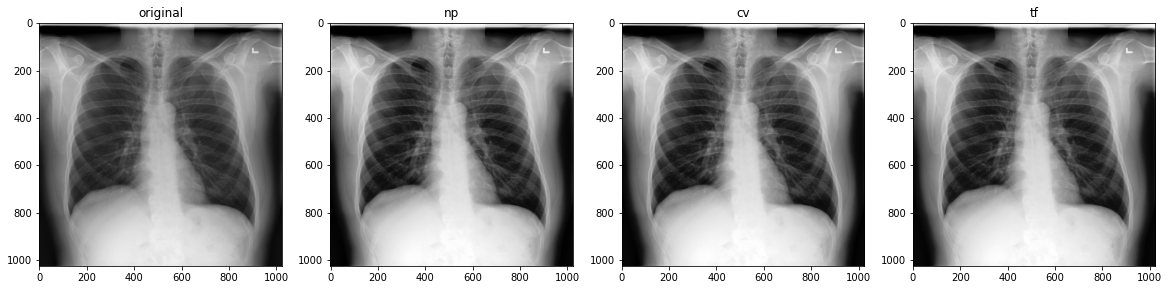

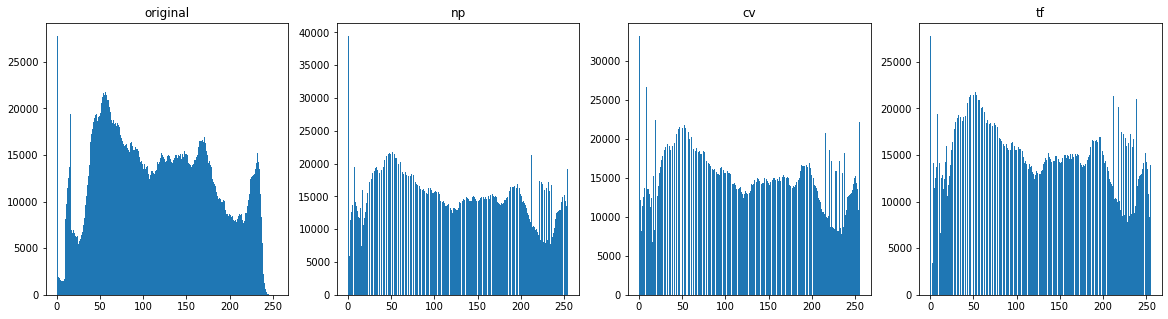

In [ ]:
# histogram equalization
def heq(img):
  hist, bins = np.histogram(img.flatten(), 256,[0,256])

  cdf = hist.cumsum()

  # cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
  # mask처리가 되면 Numpy 계산에서 제외가 됨
  # 아래는 cdf array에서 값이 0인 부분을 mask처리함
  cdf_m = np.ma.masked_equal(cdf,0)

  #History Equalization 공식
  cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

  # Mask처리를 했던 부분을 다시 0으로 변환
  cdf = np.ma.filled(cdf_m,0).astype('uint8')

  img2 = cdf[img]
  return img2

heq_np = heq(img)
heq_cv = cv2.cvtColor(cv2.equalizeHist(img[...,0]), cv2.COLOR_GRAY2RGB)
heq_tf = tfa.image.equalize(tf.convert_to_tensor(img))

plot_images((img, heq_np, heq_cv, heq_tf), ('original', 'np', 'cv', 'tf'))
plot_histogram((img, heq_np, heq_cv, heq_tf.numpy()), ('original', 'np', 'cv', 'tf'))

**Adaptive Histogram Equalization**  
![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/AHE-neighbourhoods.svg/450px-AHE-neighbourhoods.svg.png)  
**Contrast Limited Adaptive Histogram Equalization**  
![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Clahe-redist.svg/450px-Clahe-redist.svg.png)

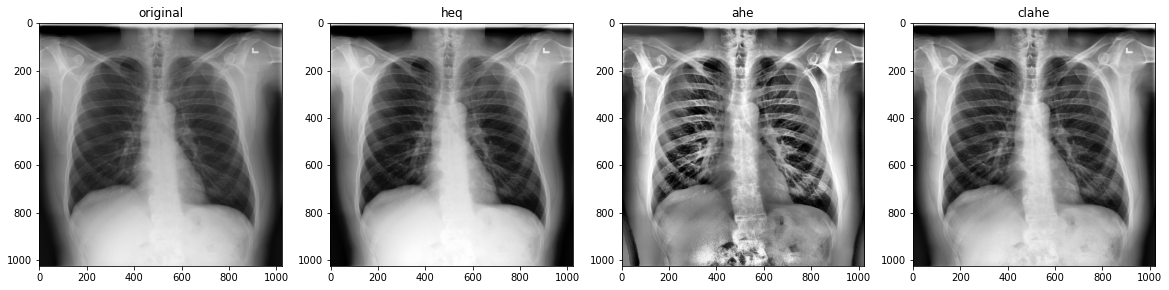

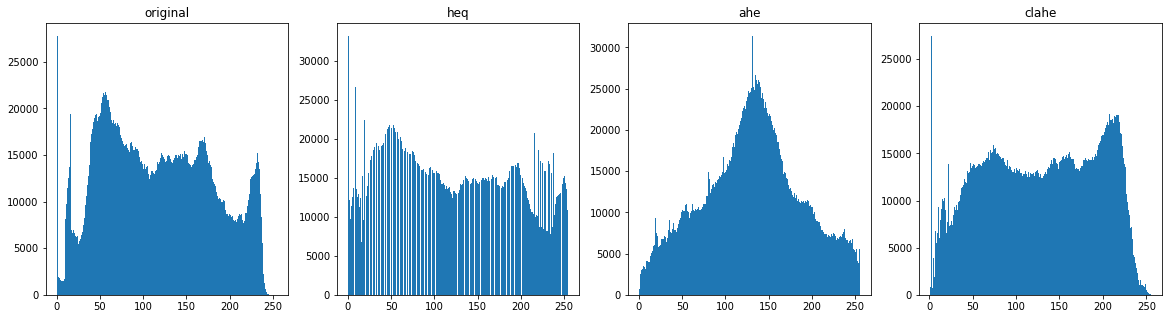

In [ ]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
ahe = cv2.createCLAHE(clipLimit=0.0, tileGridSize=(8,8))
ahe_img = cv2.cvtColor(ahe.apply(img[...,0]), cv2.COLOR_GRAY2RGB)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = cv2.cvtColor(clahe.apply(img[...,0]), cv2.COLOR_GRAY2RGB)

plot_images((img, heq_cv, ahe_img, clahe_img), ('original', 'heq', 'ahe', 'clahe'))
plot_histogram((img, heq_cv, ahe_img, clahe_img), ('original', 'heq', 'ahe', 'clahe'))

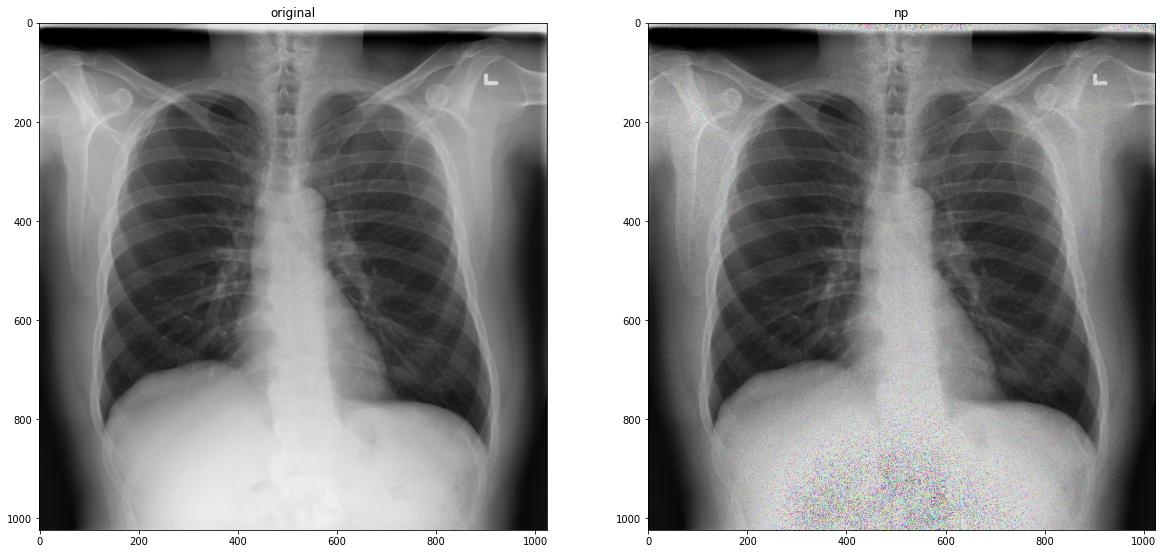

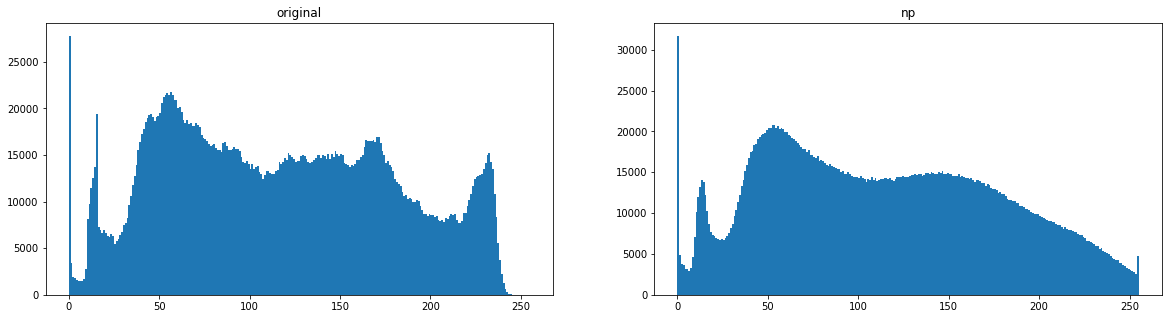

In [ ]:
# noise
noise_np = (img + img*np.random.normal(scale=0.1, size=img.shape)).astype(np.uint8)
plot_images((img, noise_np), ('original', 'np'))
plot_histogram((img, noise_np), ('original', 'np'))

### Regularization

In [ ]:
!wget -O dog.png https://gdimg.gmarket.co.kr/827896711/still/600?ver=1591258593
!wget -O cat.png https://img.kyodonews.net/english/public/images/posts/999dc7ea8c73f32baa5361320e39c19a/photo_l.jpg

--2020-10-06 05:46:16--  https://gdimg.gmarket.co.kr/827896711/still/600?ver=1591258593
Resolving gdimg.gmarket.co.kr (gdimg.gmarket.co.kr)... 104.99.68.56
Connecting to gdimg.gmarket.co.kr (gdimg.gmarket.co.kr)|104.99.68.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44411 (43K) [image/jpeg]
Saving to: ‘dog.png’

dog.png             100%[===================>]  43.37K  --.-KB/s    in 0.007s  

2020-10-06 05:46:16 (6.49 MB/s) - ‘dog.png’ saved [44411/44411]

--2020-10-06 05:46:16--  https://img.kyodonews.net/english/public/images/posts/999dc7ea8c73f32baa5361320e39c19a/photo_l.jpg
Resolving img.kyodonews.net (img.kyodonews.net)... 99.86.38.69, 99.86.38.122, 99.86.38.2, ...
Connecting to img.kyodonews.net (img.kyodonews.net)|99.86.38.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122017 (119K) [image/jpeg]
Saving to: ‘cat.png’

cat.png             100%[===================>] 119.16K  --.-KB/s    in 0.02s   

2020-10-06 05:46:17 (4

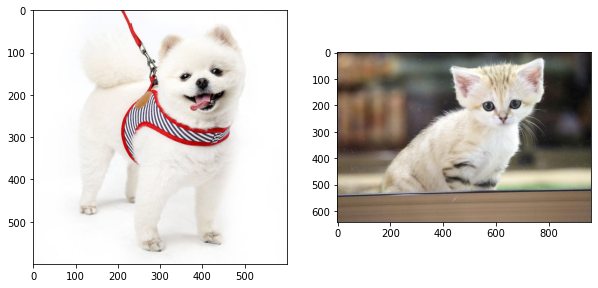

In [ ]:
dog = cv2.imread('./dog.png')[...,::-1]
cat = cv2.imread('./cat.png')[...,::-1]
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(dog)
plt.subplot(122)
plt.imshow(cat)
plt.show()

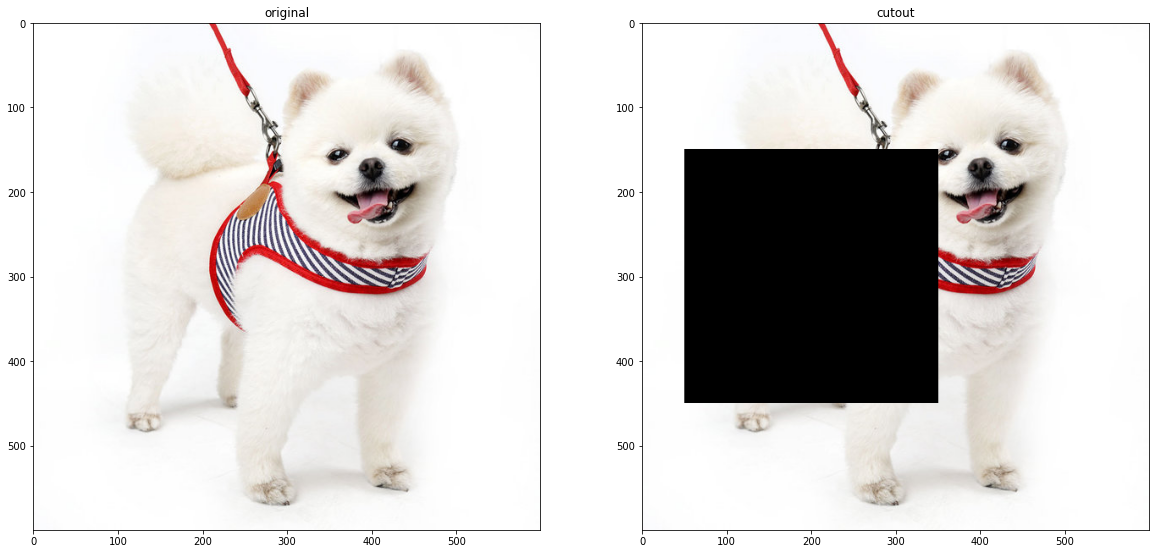

In [ ]:
# cutout
shape = dog.shape[:2]
mask_size = 300
offset = (300, 200)
cutout_tf = tfa.image.cutout(dog[np.newaxis,...], mask_size, offset)
plot_images((dog, cutout_tf[0]), ('original', 'cutout'))

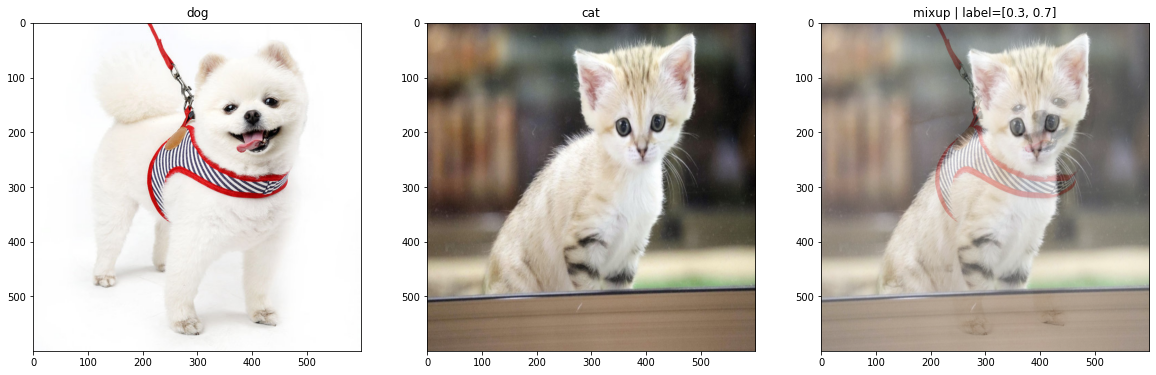

In [ ]:
# mixup
level = .3
cat_resize = tf.image.resize(cat, dog.shape[:2]).numpy().astype(np.uint8)
mixup = (dog*level + cat_resize*(1-level)).astype(np.uint8)
plot_images((dog, cat_resize, mixup), ('dog', 'cat', 'mixup | label=[{}, {}]'.format(level, 1-level)))

In [ ]:
np.prod(dog.shape[:2])

360000

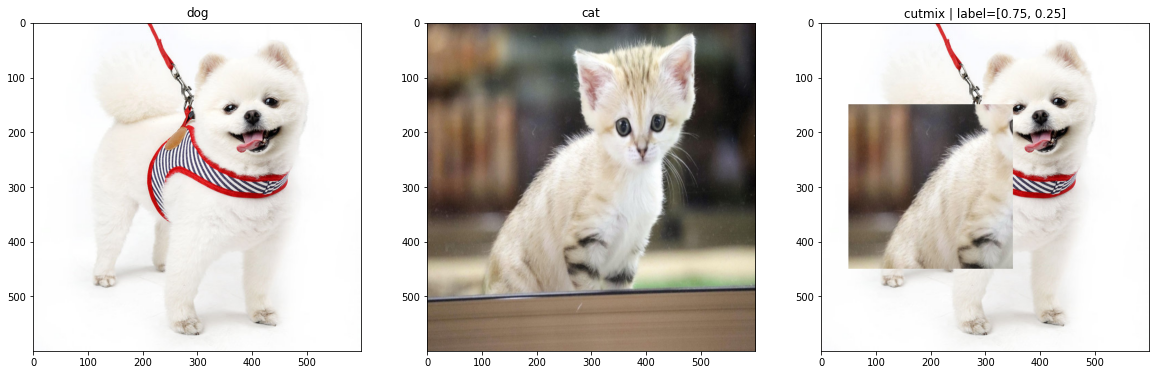

In [ ]:
# cutmix
cutmix = dog.copy()
cutmix[offset[0]-mask_size//2:offset[0]+mask_size//2,
       offset[1]-mask_size//2:offset[1]+mask_size//2] = cat_resize[offset[0]-mask_size//2:offset[0]+mask_size//2,
                                                                   offset[1]-mask_size//2:offset[1]+mask_size//2]
level = mask_size**2 / np.prod(dog.shape[:2])
plot_images((dog, cat_resize, cutmix), ('dog', 'cat', 'cutmix | label=[{}, {}]'.format(1-level, level)))